In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
#cargo primero los datos
file_dir = 'Datos/RiesgoBariloche'
data = pd.read_csv(file_dir,sep=",",usecols=["incidenciaAcum14d"],quotechar='"',na_values=[''])
df = pd.DataFrame(data)
df = df.to_numpy()
df1 = np.copy(df) #el original
df = df[:-20] #saco los ultimos 20 dias (ult 10 para probar + ult 10 retrasados)

In [4]:
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
df = df.reshape(-1,1)
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 3 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [5]:
# reshape en (samples, time steps, features) para lstm como en pract7
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [14]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=100,activation='relu',return_sequences=True,input_shape=(lag,1)))
model.add(keras.layers.LSTM(units=100,activation='relu'))
model.add(keras.layers.Dense(units=1))
optimizer = keras.optimizers.Adam(5e-2)
model.compile(optimizer,loss=keras.losses.MSE,metrics=['mse']) #metrics=['mean_absolute_percentage_error']
model.summary()
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=8,verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
Train on 231 samples, validate on 55 samples
Epoch 1/500
 - 1s - loss: 0.0319 - mse: 0.0319 - val_loss: 0.3430 - val_mse: 0.3430
Epoch 2/500
 - 0s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.1811 - val_mse: 0.1811
Epoch 3/500
 - 0s - loss: 0.0067 - mse: 0.0067 - val_loss: 0.2083 - val_mse: 0.2083
Epoch 4/500
 - 0s - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0770 - val_mse: 0.07

Epoch 80/500
 - 0s - loss: 1.7520e-04 - mse: 1.7520e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 81/500
 - 0s - loss: 6.3716e-04 - mse: 6.3716e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 82/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 83/500
 - 0s - loss: 7.8544e-04 - mse: 7.8544e-04 - val_loss: 3.0633e-04 - val_mse: 3.0633e-04
Epoch 84/500
 - 0s - loss: 8.3753e-04 - mse: 8.3753e-04 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 85/500
 - 0s - loss: 2.6628e-04 - mse: 2.6628e-04 - val_loss: 3.3869e-04 - val_mse: 3.3869e-04
Epoch 86/500
 - 0s - loss: 1.3932e-04 - mse: 1.3932e-04 - val_loss: 2.7883e-04 - val_mse: 2.7883e-04
Epoch 87/500
 - 0s - loss: 2.5825e-04 - mse: 2.5825e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 88/500
 - 0s - loss: 1.3532e-04 - mse: 1.3532e-04 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 89/500
 - 0s - loss: 2.3734e-04 - mse: 2.3734e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 90/500
 - 0s - loss: 4.2343e-04 - mse: 4.2343e-0

Epoch 165/500
 - 0s - loss: 4.1045e-04 - mse: 4.1045e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 166/500
 - 0s - loss: 2.1514e-04 - mse: 2.1514e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 167/500
 - 0s - loss: 9.6155e-05 - mse: 9.6155e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 168/500
 - 0s - loss: 1.4186e-04 - mse: 1.4186e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 169/500
 - 0s - loss: 2.8828e-04 - mse: 2.8828e-04 - val_loss: 5.2624e-04 - val_mse: 5.2624e-04
Epoch 170/500
 - 0s - loss: 1.4654e-04 - mse: 1.4654e-04 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 171/500
 - 0s - loss: 1.9572e-04 - mse: 1.9572e-04 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 172/500
 - 0s - loss: 1.7074e-04 - mse: 1.7074e-04 - val_loss: 2.9161e-04 - val_mse: 2.9161e-04
Epoch 173/500
 - 0s - loss: 4.3973e-04 - mse: 4.3973e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 174/500
 - 0s - loss: 5.5824e-04 - mse: 5.5824e-04 - val_loss: 4.9366e-04 - val_mse: 4.9366e-04
Epoch 175/500
 - 0s - loss: 3.3774e-

Epoch 250/500
 - 0s - loss: 1.5066e-04 - mse: 1.5066e-04 - val_loss: 3.2657e-04 - val_mse: 3.2657e-04
Epoch 251/500
 - 0s - loss: 5.9955e-04 - mse: 5.9955e-04 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 252/500
 - 0s - loss: 4.9401e-04 - mse: 4.9401e-04 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 253/500
 - 0s - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0842 - val_mse: 0.0842
Epoch 254/500
 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 255/500
 - 0s - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 256/500
 - 0s - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 257/500
 - 0s - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 258/500
 - 0s - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 259/500
 - 0s - loss: 7.3744e-04 - mse: 7.3744e-04 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 260/500
 - 0s - loss: 2.1476e-04 - mse: 2.1476e-04 - val_loss: 6.8198e-04 - val_mse: 6.8198e-0

Epoch 336/500
 - 0s - loss: 1.1592e-04 - mse: 1.1592e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 337/500
 - 0s - loss: 6.7541e-05 - mse: 6.7541e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 338/500
 - 0s - loss: 7.9623e-05 - mse: 7.9623e-05 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 339/500
 - 0s - loss: 2.1178e-04 - mse: 2.1178e-04 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 340/500
 - 0s - loss: 3.1462e-04 - mse: 3.1462e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 341/500
 - 0s - loss: 2.5748e-04 - mse: 2.5748e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 342/500
 - 0s - loss: 9.5253e-05 - mse: 9.5253e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 343/500
 - 0s - loss: 8.8613e-05 - mse: 8.8613e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 344/500
 - 0s - loss: 1.4709e-04 - mse: 1.4709e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 345/500
 - 0s - loss: 6.8450e-05 - mse: 6.8450e-05 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 346/500
 - 0s - loss: 1.0031e-04 - mse: 1.0031e-04 - v

Epoch 423/500
 - 0s - loss: 5.5857e-04 - mse: 5.5857e-04 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 424/500
 - 0s - loss: 1.7531e-04 - mse: 1.7531e-04 - val_loss: 4.5683e-04 - val_mse: 4.5683e-04
Epoch 425/500
 - 0s - loss: 1.0032e-04 - mse: 1.0032e-04 - val_loss: 3.8557e-04 - val_mse: 3.8557e-04
Epoch 426/500
 - 0s - loss: 1.3218e-04 - mse: 1.3218e-04 - val_loss: 3.4328e-04 - val_mse: 3.4328e-04
Epoch 427/500
 - 0s - loss: 1.0160e-04 - mse: 1.0160e-04 - val_loss: 7.3237e-04 - val_mse: 7.3237e-04
Epoch 428/500
 - 0s - loss: 9.1510e-05 - mse: 9.1510e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 429/500
 - 0s - loss: 7.6086e-05 - mse: 7.6086e-05 - val_loss: 9.4255e-04 - val_mse: 9.4255e-04
Epoch 430/500
 - 0s - loss: 8.4167e-05 - mse: 8.4167e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 431/500
 - 0s - loss: 3.2811e-04 - mse: 3.2811e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 432/500
 - 0s - loss: 2.1260e-04 - mse: 2.1260e-04 - val_loss: 5.6522e-04 - val_mse: 5.6522e-04
Epoch 433/50

In [15]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [16]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict)))
print('test mse squared:',np.sqrt(mean_squared_error(y_test,test_predict))) 

train mse squared: 106.99721194444624
test mse squared: 391.6073956581044


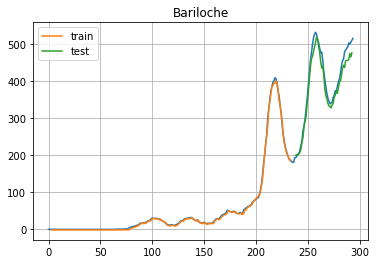

In [18]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Bariloche')
plt.legend()
plt.show()

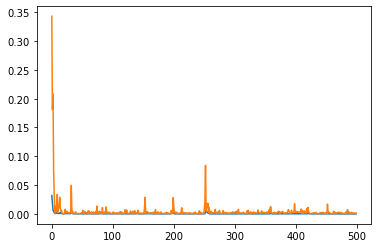

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# aca hacemos el forecast

In [20]:
n = len(test_data)
x_input=test_data[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<20): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, lag, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, lag,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

1 day output [[0.8482412]]
2 day output [[0.7530129]]
3 day output [[0.64422494]]
4 day output [[0.53706473]]
5 day output [[0.44126254]]
6 day output [[0.36790556]]
7 day output [[0.3170578]]
8 day output [[0.288084]]
9 day output [[0.27986193]]
10 day output [[0.28720963]]
11 day output [[0.30458474]]
12 day output [[0.32816023]]
13 day output [[0.35521913]]
14 day output [[0.38350368]]
15 day output [[0.4108152]]
16 day output [[0.43508017]]
17 day output [[0.45456904]]
18 day output [[0.46818742]]
19 day output [[0.47556075]]


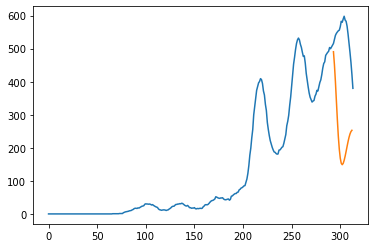

In [21]:
plt.plot(df1)
dias_forecast = np.arange(0,20) + len(df) - 1
plt.plot(dias_forecast,scaler.inverse_transform(lst_output))